In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes = True)

In [3]:
%load_ext autoreload
%autoreload 2    
%matplotlib inline

### Loading Dataset

In [8]:
df_Train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [10]:
df_Train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [12]:
df_test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


### Preprocessing - Missing Value Analysis

In [15]:
df_Train.isnull().sum()

x    0
y    1
dtype: int64

In [17]:
df_test.isnull().sum()

x    0
y    0
dtype: int64

In [19]:
def missing_values(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [21]:
missing_values(df_Train)

Your selected dataframe has 2 columns.
There are 1 columns that have missing values.


,Missing Values,% of Total Values
y,1,0.1


In [23]:
missing_values(df_test) # No missing values

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [27]:
df_Train.shape

(700, 2)

### Dropping the row with missing value

In [29]:
df_train = df_Train.dropna()

In [31]:
df_train.shape

(699, 2)

### Visualization

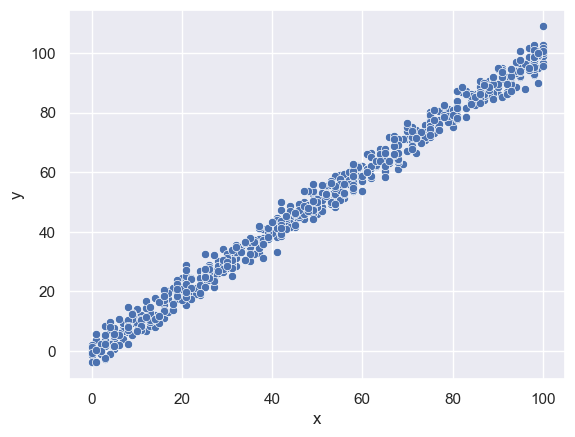

In [33]:
sns.scatterplot(data = df_train, x = 'x', y = 'y')
plt.show()

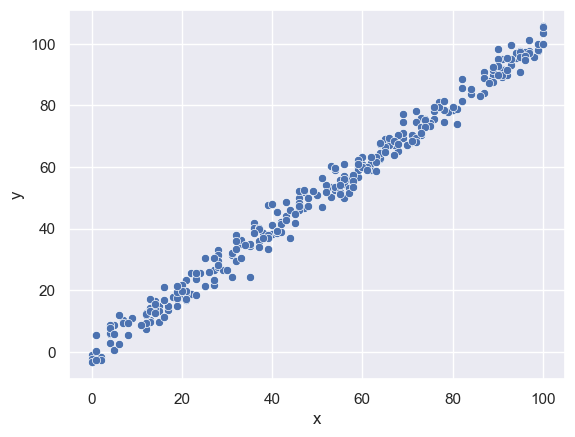

In [35]:
sns.scatterplot(data = df_test, x = 'x', y = 'y')
plt.show()

### Setting Dependent and Independent Variables

In [38]:
# For Training
X_train = df_train.iloc[:,0:1].values
y_train = df_train.iloc[:,1].values

In [40]:
# For Testing
X_test = df_test.iloc[:,0:1].values
y_test = df_test.iloc[:,1].values

In [42]:
X_train.shape

(699, 1)

In [44]:
y_train.shape

(699,)

In [46]:
X_test.shape

(300, 1)

In [48]:
y_test.shape

(300,)

### Modelling the data

In [51]:
from sklearn.linear_model import LinearRegression

In [53]:
model = LinearRegression(fit_intercept = True)

In [55]:
model.fit(X_train, y_train)

LinearRegression()

### Visualizing the results

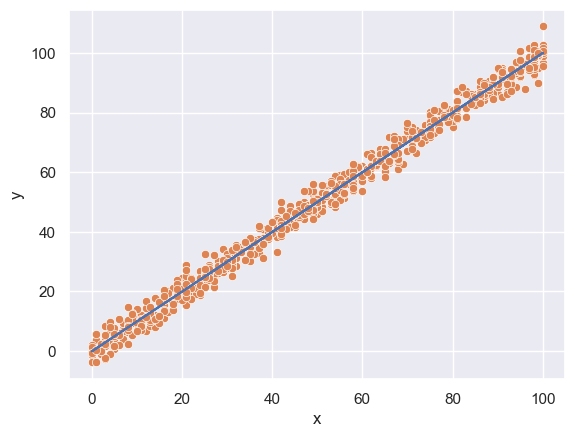

In [73]:
sns.scatterplot(data = df_train, x = 'x', y = 'y')
plt.plot(X_train, model.predict(X_train))
plt.show()

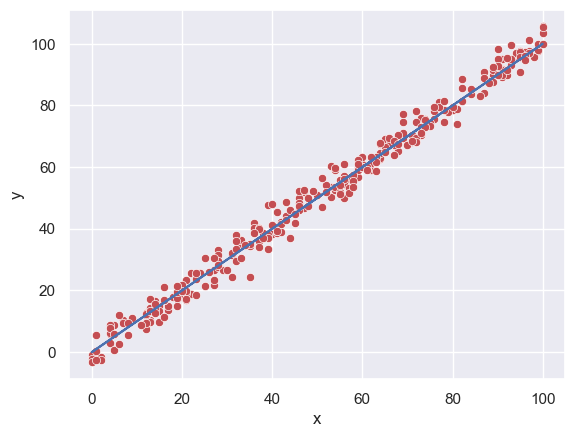

In [83]:
sns.scatterplot(data = df_test, x = 'x', y = 'y')
plt.plot(X_test, model.predict(X_test))
plt.show()

### Analysis of Predictions using different metrics

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [89]:
mean_absolute_error(y_train, model.predict(X_train))

2.2271519536455577

In [91]:
mean_squared_error(y_train, model.predict(X_train))

7.867752733487686

In [95]:
r2_score(y_train, model.predict(X_train))

0.9907015319025518

In [99]:
# For Test Data
print('The mean absolute error is',mean_absolute_error(y_test, model.predict(X_test)))
print('The mean squared error is',mean_squared_error(y_test, model.predict(X_test)))
print('The r2 score is',r2_score(y_test, model.predict(X_test)))

The mean absolute error is 2.4157718500412586
The mean squared error is 9.43292219203931
The r2 score is 0.9888014444327563


### Pickling the Model for Deployment

In [102]:
import pickle

In [104]:
pickle.dump(model,open('model.pkl','wb'))

In [106]:
pickled_model=pickle.load(open('model.pkl','rb'))

In [149]:
## Prediction
pickled_model.predict(((df_train[['x']].values)[0]).reshape(-1,1))[0]

23.90848770025033

In [145]:
(df_train[['x']].values)[0]

array([24.])